# Week 4 Exercise Numpy

#### Exercise 1

In [34]:
# 1. Open the file './befkbhalderstatkode.csv'
# 2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

import numpy
from numpy import genfromtxt
import matplotlib.pyplot as plt

filename = 'befkbhalderstatkode.csv'

my_data = genfromtxt(filename, delimiter=',', dtype=numpy.uint, skip_header=1)

In [35]:
# 3. Using this data, find out how many people lived in each of the 11 areas in 2015

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = my_data[mask & (my_data[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is number of 'PERSONER'
    return sum_of_people

amount_of_people = {key: number_of_people_per_neighbourhood(key, (my_data[:,0] == 2015)) for key in neighb.keys()}

# Function to get only numbers
#amount_of_people = numpy.array([number_of_people_per_neighbourhood(key, (dd[:,0] == 2015)) for key in neighb.keys()])

print(amount_of_people)

neighbourhood = numpy.array({key: value for key, value in neighb.items()})

print(neighbourhood)

{1: 51937, 2: 75113, 3: 78802, 4: 61623, 5: 51727, 6: 39537, 7: 43908, 8: 53604, 9: 55205, 10: 64967, 99: 3872}
{1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 10: 'Amager Vest', 99: 'Udenfor'}


Text(0.5, 1.0, 'People in Cities')

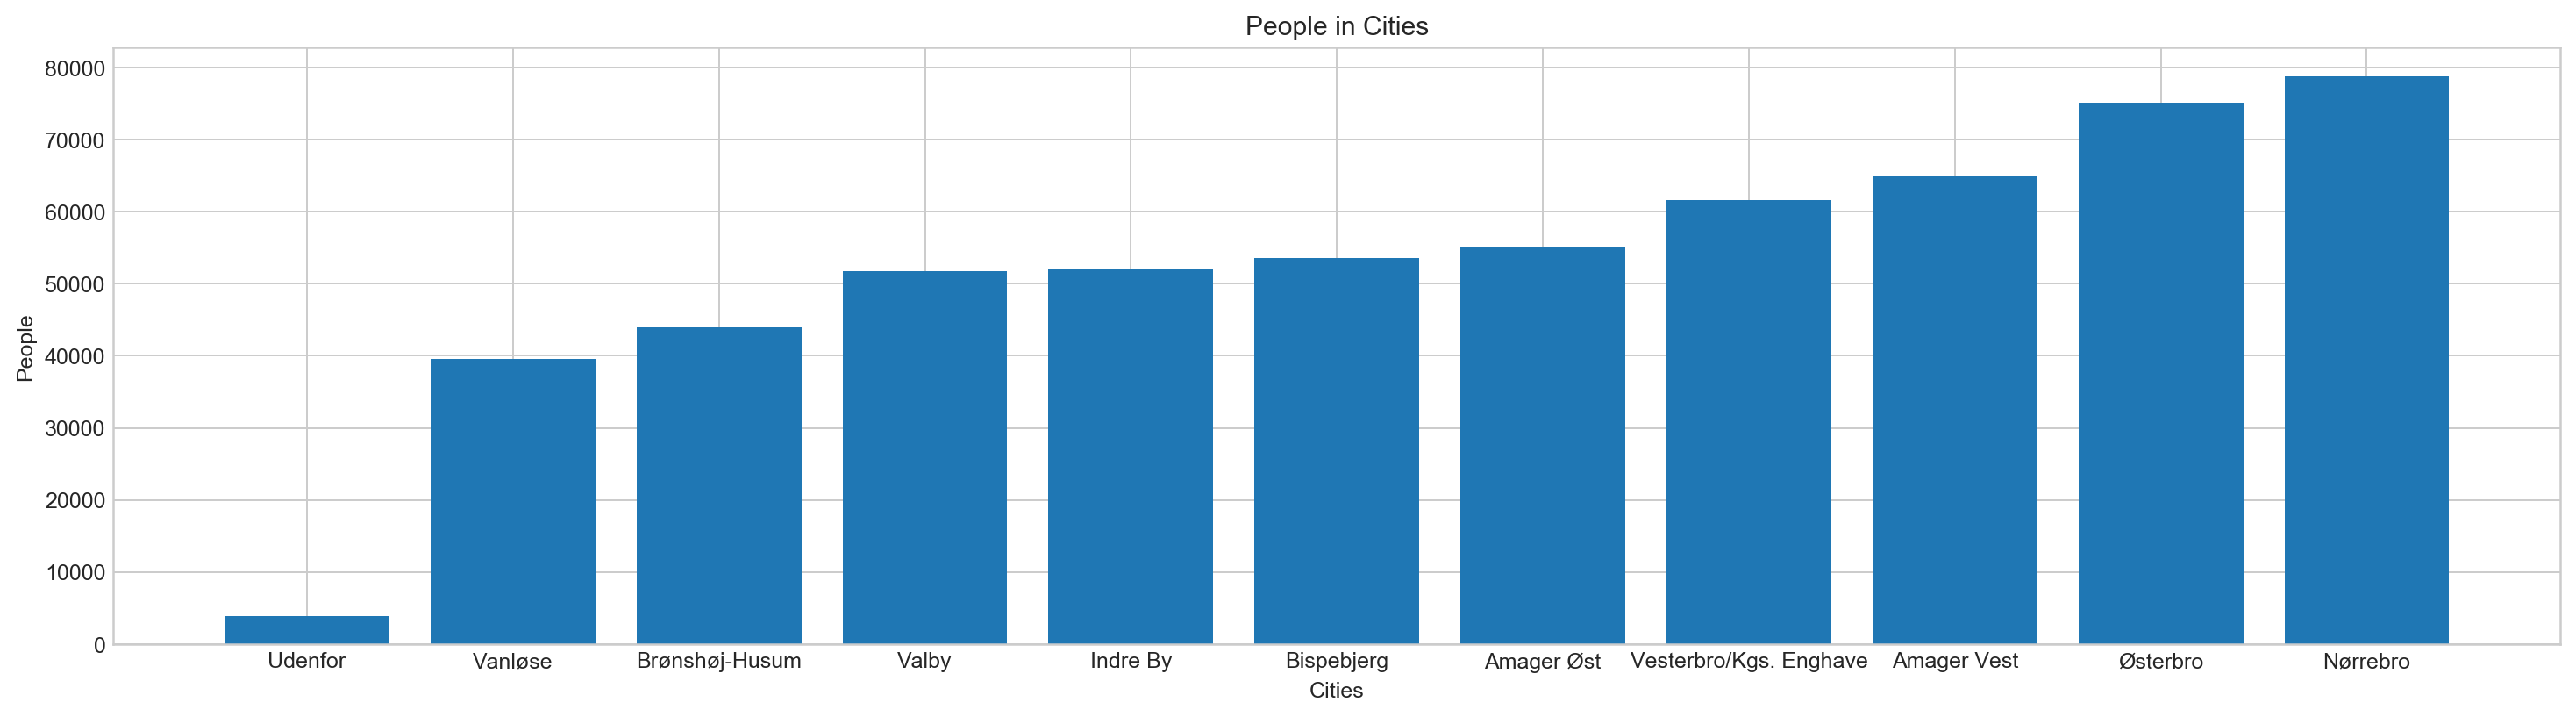

In [36]:
# 4. Make a bar plot to show the size of each city area from the smallest to the largest

amount_of_people = {key: value for key, value in sorted(amount_of_people.items(), key=lambda item: item[1])}

#print(amount_of_people)

y_bar = [neighb[l] for l in amount_of_people]
x_bar = amount_of_people.values()
    
plt.figure(num=None, figsize=(20, 5), dpi=180, facecolor='w', edgecolor='k')
plt.bar(y_bar, x_bar)
plt.ylabel('People')
plt.xlabel('Cities')
plt.title('People in Cities')

In [37]:
# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

above_65_CPH_2015 = (my_data[:,0] == 2015) & (my_data[:,2] >= 65) & (my_data[:,1] != 99)

# 6. How many of those were from the other nordic countries (not dk)

above_65_CPH_2015_notDK_scandinavia = (my_data[:,0] == 2015) & (my_data[:,2] >= 65) & (my_data[:,1] == 99)

print('65 years or older in CPH, 2015: {}'.format(numpy.sum(my_data[above_65_CPH_2015][:,4])))
print('65 years or older in other, 2015: {}'.format(numpy.sum(my_data[above_65_CPH_2015_notDK_scandinavia][:,4])))

65 years or older in CPH, 2015: 59799
65 years or older in other, 2015: 60


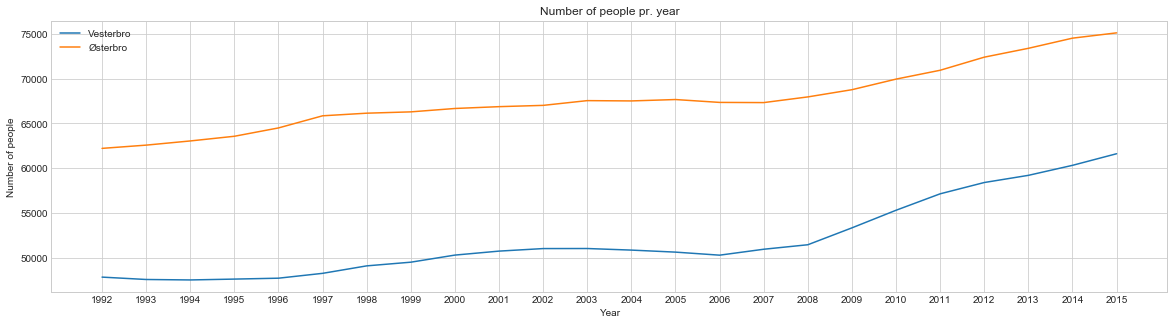

In [38]:
# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

def period_of_change(n, mask):
    all_people_in_given_n = my_data[mask & (my_data[:,0] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

mask_vesterbro = (my_data[:,0] >= 1992) & (my_data[:,0] <= 2015) & (my_data[:,1] == 4)
mask_osterbro = (my_data[:,0] >= 1992) & (my_data[:,0] <= 2015) & (my_data[:,1] == 2)

y_bar = list(set(my_data[mask_vesterbro][:,0]))
x_bar = numpy.array([period_of_change(n, mask_vesterbro) for n in y_bar])
x_bar2 = numpy.array([period_of_change(n, mask_osterbro) for n in y_bar])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))
plt.plot(y_bar, x_bar, label="Vesterbro")
plt.plot(y_bar, x_bar2, label='Østerbro')
plt.xticks(y_bar)
plt.ylabel('Number of people')
plt.xlabel('Year')
plt.title('Number of people pr. year')
plt.legend()
